## 綜合損益表爬蟲

In [1]:
import requests
url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb04'
payload = {
'encodeURIComponent': '1',
'step': '1',
'firstin': '1',
'off': '1',
'TYPEK': 'sii',
'year': '103',
'season': '01',    
}
res = requests.post(url, data = payload)

In [2]:
res

<Response [200]>

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

### Method 1

In [7]:
tb = soup.select('table')

In [21]:
trs =  tb[4].select('tr')
columns = [th.text for th in trs[0].select('th')]

In [24]:
data = [td.text for td in trs[1].select('td')]

In [28]:
data = []
for rec in trs[1:]:
    data.append([td.text for td in rec.select('td')])

In [30]:
import pandas
df  = pandas.DataFrame(data)
df.columns = columns
df

,公司代號,公司名稱,利息淨收益,利息以外淨收益,淨收益,呆帳費用及保證責任準備提存,保險負債準備淨變動,營業費用,繼續營業單位稅前損益,所得稅（費用）利益,...,本期稅後淨利（淨損）,本期其他綜合損益（稅後淨額）,本期綜合損益總額,淨利（淨損）歸屬於母公司業主,淨利（淨損）歸屬於共同控制下前手權益,淨利（淨損）歸屬於非控制權益,綜合損益總額歸屬於母公司業主,綜合損益總額歸屬於共同控制下前手權益,綜合損益總額歸屬於非控制權益,基本每股盈餘（元）
0,2880,華南金,"6,116,103","3,542,654","9,658,757","1,034,246","159,025","4,908,452","3,557,034","-539,261",...,"3,017,773","223,194","3,240,967","3,017,769",--,4,"3,240,963",--,4,0.33
1,2881,富邦金,"21,793,663","75,588,757","97,382,420","-12,815","69,112,119","11,446,946","16,836,170","-2,901,351",...,"13,934,819","17,706,696","31,641,515","13,865,623",--,"69,196","31,615,681",--,"25,834",1.35
2,2882,國泰金,"30,534,282","55,168,218","85,702,500","-7,675","60,276,071","12,774,563","12,659,541","-306,333",...,"12,353,208","2,897,609","15,250,817","12,285,080",--,"68,128","15,112,594",--,"138,223",1.03
3,2883,開發金,"1,787,077","4,836,530","6,623,607","-73,588",--,"3,618,723","3,078,472","-343,746",...,"2,734,726","714,045","3,448,771","2,688,590",--,"46,136","3,402,213",--,"46,558",0.18
4,2884,玉山金控,"3,498,417","4,466,997","7,965,414","374,122",--,"4,005,023","3,586,269","-712,201",...,"2,874,068","136,780","3,010,848","2,858,458",--,"15,610","2,979,339",--,"31,509",0.50
5,2885,元大金,"3,153,226","7,965,630","11,118,856","446,676","1,518,194","4,905,426","4,248,560","-458,727",...,"3,789,833","399,323","4,189,156","3,607,571",--,"182,262","4,025,358",--,"163,798",0.36
6,2886,兆豐金,"8,706,985","6,431,729","15,138,714","141,186","3,814","5,572,777","9,420,937","-1,378,476",...,"8,042,461","1,238,815","9,281,276","8,042,579",0,-118,"9,272,955",0,"8,321",0.65
7,2887,台新金控,"8,335,031","7,381,326","15,716,357","-722,209",--,"7,999,605","8,438,961","-1,217,374",...,"7,221,587","164,315","7,385,902","4,823,752",--,"2,397,835","4,856,642",--,"2,529,260",0.61
8,2888,新光金,"14,933,524","25,819,966","40,753,490","411,071","33,100,327","5,495,000","1,747,092","-341,613",...,"1,405,479","-1,551,481","-146,002","1,182,646",--,"222,833","-389,867",--,"243,865",0.13
9,2889,國票金控,"436,804","1,014,332","1,451,136","16,455",--,"676,661","758,020","-101,842",...,"656,178","63,362","719,540","531,803",--,"124,375","572,739",--,"146,801",0.21


### Method 2

In [43]:
import pandas
tb = soup.select('table')
type(tb[4])

# prettify : bs4.element  => string
dfs = pandas.read_html(tb[4].prettify(), header=0)

In [44]:
dfs[0]

,公司 代號,公司名稱,利息淨收益,利息以外淨收益,淨收益,呆帳費用及保證責任準備提存,保險負債準備淨變動,營業費用,繼續營業單位稅前損益,所得稅（費用）利益,...,本期稅後淨利（淨損）,本期其他綜合損益（稅後淨額）,本期綜合損益總額,淨利（淨損）歸屬於母公司業主,淨利（淨損）歸屬於共同控制下前手權益,淨利（淨損）歸屬於非控制權益,綜合損益總額歸屬於母公司業主,綜合損益總額歸屬於共同控制下前手權益,綜合損益總額歸屬於非控制權益,基本每股盈餘（元）
0,2880,華南金,6116103,3542654,9658757,1034246,159025,4908452,3557034,-539261,...,3017773,223194,3240967,3017769,--,4,3240963,--,4,0.33
1,2881,富邦金,21793663,75588757,97382420,-12815,69112119,11446946,16836170,-2901351,...,13934819,17706696,31641515,13865623,--,69196,31615681,--,25834,1.35
2,2882,國泰金,30534282,55168218,85702500,-7675,60276071,12774563,12659541,-306333,...,12353208,2897609,15250817,12285080,--,68128,15112594,--,138223,1.03
3,2883,開發金,1787077,4836530,6623607,-73588,--,3618723,3078472,-343746,...,2734726,714045,3448771,2688590,--,46136,3402213,--,46558,0.18
4,2884,玉山金控,3498417,4466997,7965414,374122,--,4005023,3586269,-712201,...,2874068,136780,3010848,2858458,--,15610,2979339,--,31509,0.50
5,2885,元大金,3153226,7965630,11118856,446676,1518194,4905426,4248560,-458727,...,3789833,399323,4189156,3607571,--,182262,4025358,--,163798,0.36
6,2886,兆豐金,8706985,6431729,15138714,141186,3814,5572777,9420937,-1378476,...,8042461,1238815,9281276,8042579,0,-118,9272955,0,8321,0.65
7,2887,台新金控,8335031,7381326,15716357,-722209,--,7999605,8438961,-1217374,...,7221587,164315,7385902,4823752,--,2397835,4856642,--,2529260,0.61
8,2888,新光金,14933524,25819966,40753490,411071,33100327,5495000,1747092,-341613,...,1405479,-1551481,-146002,1182646,--,222833,-389867,--,243865,0.13
9,2889,國票金控,436804,1014332,1451136,16455,--,676661,758020,-101842,...,656178,63362,719540,531803,--,124375,572739,--,146801,0.21


## 完整的綜合損益表爬蟲

In [53]:
import requests
url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb04'
payload = {
'encodeURIComponent': '1',
'step': '1',
'firstin': '1',
'off': '1',
'TYPEK': 'sii',
'year':  '103',
'season': '01',    
}
data_ary = []
for year in range(103, 104):
    for season in ['01','02','03','04']:
        payload['year']   = str(year)
        payload['season'] = season
        res = requests.post(url, data = payload)
        soup = BeautifulSoup(res.text, 'lxml')
        tb = soup.select('table')
        dfs = pandas.read_html(tb[4].prettify(), header=0)
        dfs[0]['year'] = year
        dfs[0]['season'] = season
        data_ary.append(dfs[0])
        print(year, season)

103 01
103 02
103 03
103 04


In [54]:
financedf = pandas.concat(data_ary)

In [59]:
financedf.groupby('公司名稱')['基本每股盈餘（元）'].mean().sort_values(ascending=False)

公司名稱
富邦金     3.7875
國泰金     2.7325
中信金     1.8725
兆豐金     1.5725
元大金     1.1275
玉山金控    1.0450
第一金控    1.0225
永豐金控    0.9900
華南金     0.8675
台新金控    0.8050
合庫金     0.7225
國票金控    0.4575
新光金     0.4550
開發金     0.4450
Name: 基本每股盈餘（元）, dtype: float64

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rec']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


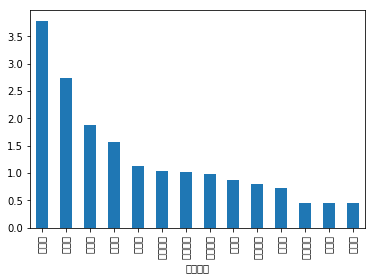

In [61]:
%pylab inline
financedf.groupby('公司名稱')['基本每股盈餘（元）'].mean().sort_values(ascending=False).plot(kind = 'bar')

In [62]:
stat = financedf.groupby('公司名稱')['基本每股盈餘（元）'].mean()

In [63]:
stat

公司名稱
中信金     1.8725
元大金     1.1275
兆豐金     1.5725
台新金控    0.8050
合庫金     0.7225
國泰金     2.7325
國票金控    0.4575
富邦金     3.7875
新光金     0.4550
永豐金控    0.9900
玉山金控    1.0450
第一金控    1.0225
華南金     0.8675
開發金     0.4450
Name: 基本每股盈餘（元）, dtype: float64

In [68]:
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
pyo.init_notebook_mode(connected=True)
data = [go.Bar(
    x=stat.index,  
    y=stat
)]


In [69]:
pyo.iplot(data, filename='bar1.html')


## 文字探勘

In [70]:
s = 'this is a book'
s.split()

['this', 'is', 'a', 'book']

In [71]:
! pip install jieba

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [73]:
import jieba
list(jieba.cut('那酸民婉君也可以報名嗎'))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/46/b7dzk4mn6g54qzptv608w7d00000gn/T/jieba.cache
Loading model cost 1.012 seconds.
Prefix dict has been built succesfully.


['那酸民婉君', '也', '可以', '報名', '嗎']

In [74]:
article = '「人生短短幾個秋～不醉不罷休～」，無黨籍台北市長候選人吳萼洋，因在電視辯論會上大推蜂蜜檸檬及清唱《愛江山更愛美人》而引爆話題，改編出包括《憨智回頭》、《缺電英》等多首神曲的「老天鵝娛樂」搭上熱潮，就以《愛江山更愛美人》來改編成《愛蜂蜜也愛檸檬》，讓吳萼洋都在粉專分享大讚「台灣創意王國的另一種呈現」。'

In [80]:
import re
re.split('，|《|》|～|」|「', article)

['',
 '人生短短幾個秋',
 '不醉不罷休',
 '',
 '',
 '無黨籍台北市長候選人吳萼洋',
 '因在電視辯論會上大推蜂蜜檸檬及清唱',
 '愛江山更愛美人',
 '而引爆話題',
 '改編出包括',
 '憨智回頭',
 '、',
 '缺電英',
 '等多首神曲的',
 '老天鵝娛樂',
 '搭上熱潮',
 '就以',
 '愛江山更愛美人',
 '來改編成',
 '愛蜂蜜也愛檸檬',
 '',
 '讓吳萼洋都在粉專分享大讚',
 '台灣創意王國的另一種呈現',
 '。']

In [81]:
import jieba

seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=True)
type(seg_list)

generator

In [82]:
for w in seg_list:
    print(w)

大
巨蛋
案
對
市府
同仁
下
封口
封口令
口令



柯
P
否
認


In [83]:
seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認")

for w in seg_list:
    print(w)

大
巨蛋
案對
市府
同仁
下
封口令
？
　
柯
P
否認


In [84]:
jieba.load_userdict('userdict.txt')

seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認")

for w in seg_list:
    print(w)

大巨蛋
案對
市府
同仁
下
封口令
？
　
柯P
否認


In [86]:
import jieba.posseg as pseg
jieba.load_userdict('userdict.txt')
words = pseg.cut("大巨蛋案對市府同仁下封口令？　柯P否認")
for w in words:
    print(w.word, w.flag)


大巨蛋 n
案 ng
對 p
市府 n
同仁 nr
下 f
封口令 n
？ x
　 x
柯P nr
否認 v


In [88]:
sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.tokenize(sentence)

for tw in words:
    print(tw[0], tw[1], tw[2])


大巨蛋 0 3
案對 3 5
市府 5 7
同仁 7 9
下 9 10
封口令 10 13
？ 13 14
　 14 15
柯P 15 17
否認 17 19


## 利用爬蟲擴增字典

In [90]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://zh.wikipedia.org/wiki/%E6%9F%AF%E6%96%87%E5%93%B2')
soup = BeautifulSoup(res.text, 'lxml')

In [108]:
[b.text for b in soup.select('#mw-content-text p')[6].select('b')]

['柯文哲', 'Ko Wen-je', '柯P', 'KP']

In [111]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://udn.com/news/story/6928/3484386')
soup = BeautifulSoup(res.text)
[e.text for e in soup.select('#story_tags a')]

['郭明政', '政大', '校長遴選']

## n-gram

In [114]:
sentence='那我們酸民婉君也可以報名嗎'
for i in range(0,len(sentence) - 2 + 1):
    print(sentence[i:i+2])

那我
我們
們酸
酸民
民婉
婉君
君也
也可
可以
以報
報名
名嗎


In [115]:
sentence='那我們酸民婉君也可以報名嗎'
for i in range(0,len(sentence) - 3 + 1):
    print(sentence[i:i+3])

那我們
我們酸
們酸民
酸民婉
民婉君
婉君也
君也可
也可以
可以報
以報名
報名嗎


In [116]:
def ngram(input_sentence,n=2):
    ret = []
    for i in range(0,len(input_sentence) - n + 1):
        ret.append(input_sentence[i:i+n])
    return ret

ngram(sentence)

['那我', '我們', '們酸', '酸民', '民婉', '婉君', '君也', '也可', '可以', '以報', '報名', '名嗎']

In [117]:
ngram(sentence, n = 3)

['那我們', '我們酸', '們酸民', '酸民婉', '民婉君', '婉君也', '君也可', '也可以', '可以報', '以報名', '報名嗎']

In [120]:
sentence = '''
台北市長候選人吳蕚洋日前在辯論會大談蜂蜜檸檬好處，結尾又清唱《愛江山更愛美人》，讓這首24年前的歌曲爆紅，原曲MV點閱率上衝到461萬，原唱李麗芬還被拱在跨年和吳蕚洋合體，對此，李麗芬也做出回應。

吳蕚洋不只讓蜂蜜檸檬和歌曲《愛江山更愛美人》爆紅，歌曲原唱李麗芬也成為話題人物，她日前就在臉書發文，原曲MV點閱次數已上衝到461萬，還有網友拱吳蕚洋和李麗芬在跨年晚會合體，李麗芬則寫下：「柯市長不太可能答應的」，也讓網友超期待「想看+1」、「求合體，今年最佳跨年勁曲就是這首了」。

網友期待看到吳蕚洋和李麗芬合體，根據《聯合報》報導，李麗芬鬆口表示，目前市政府沒有邀約，若有適當酬勞，她願意和吳萼洋在跨年晚會合體「我可以開心上台，台上台下的朋友一起合唱。」
'''

In [122]:
from collections import Counter
c = Counter(ngram(sentence, n = 3))

In [123]:
c.most_common(5)

[('李麗芬', 7), ('吳蕚洋', 5), ('合體，', 4), ('在跨年', 3), ('，李麗', 3)]

In [124]:
from collections import Counter
c = Counter(ngram(sentence, n = 2))

In [125]:
c.most_common(5)

[('李麗', 7), ('麗芬', 7), ('吳蕚', 5), ('蕚洋', 5), ('合體', 5)]

In [128]:
import re
sentence = '台北市長候選人吳蕚洋日前在辯論會大談蜂蜜檸檬好處，結尾又清唱《愛江山更愛美人》，讓這首24年前的歌曲爆紅，原曲MV點閱率上衝到461萬，原唱李麗芬還被拱在跨年和吳蕚洋合體，對此，李麗芬也做出回應。'
re.split('，|《|》', sentence)

['台北市長候選人吳蕚洋日前在辯論會大談蜂蜜檸檬好處',
 '結尾又清唱',
 '愛江山更愛美人',
 '',
 '讓這首24年前的歌曲爆紅',
 '原曲MV點閱率上衝到461萬',
 '原唱李麗芬還被拱在跨年和吳蕚洋合體',
 '對此',
 '李麗芬也做出回應。']

In [131]:
def removeKey(text, keywords):
    ret = text
    for kw in keywords:
        ret = ret.replace(kw, '')
    return ret
s = '台北市長候選人吳蕚洋日前在辯論會大談蜂蜜檸檬好處'
removeKey(s, ['吳蕚洋', '蜂蜜檸檬'])

'台北市長候選人日前在辯論會大談好處'

In [139]:
sentence = '''
選戰進入最後倒數，除了候選人努力拉票，家人成為最大的助手，台北市長柯文哲為了拚連任，請出柯爸柯媽當拉票機助選，兩老今一早就前往新東市場陪松山、信義區議員候選人洪士奇掃街拜票，途中遇到有民眾向柯媽陳情抗議柯文哲亂砍重陽老金，柯媽則表示身體健康最重要，反問「身體不好拿1500要幹嘛？」

陳情民眾見到柯媽媽來了，趕緊上前訴苦，「我4年前投給柯文哲，沒想到卻造成自己的傷害！」抗議全台都有敬老金1500元，台北市財政最好，最有資格提供，就連柯爸柯媽自己在新竹也有領，但柯文哲卻剝奪老人的權利，「一個市長不只是還債，還債不是市長的任務。」


圖／TVBS資料畫面

對此柯媽則表示，他會把意見向柯文哲反映，緩頰雖然沒有敬老金，但有替長者免費施打肺炎疫苗，一針要3千多元，等於2年的敬老金，還可以防範10年以上，強調身體健康比什麼都重要，還反問「身體不好拿1500元要幹嘛？」

對於台北市長選情緊繃，柯媽說「我掃我的，柯文哲自己會掃街」，認為選舉是由天不由人，選不選得上要看大眾，不是自己說了算，但還是有信心兒子能勝選。'''

In [140]:
sentenceAry = re.split('，|《|》', sentence)

In [141]:
keywords = []

In [142]:

for n in range(4,1,-1):
    words = []
    for sentence in sentenceAry:
        text_list = removeKey(sentence, keywords)
        words.extend(ngram(text_list, n))
        
    c = Counter(words)
    for w, cnt in c.items():
        if cnt >= 3:
            keywords.append(w)

In [143]:
keywords

['1500', '台北市', '柯文哲', '」\n\n', '敬老金', '柯媽', '身體', '自己']

In [ ]:
sample_text  = '''

    第一階段：

    好，各位電視機前面的朋友大家好。我是市長候選人登記第四號的柯文哲。

    我在2014年的時候以素人的身份參選，我的競選口號是「改變台灣從首都開
    始，改變台北從文化開始，這是一場以文化為主體的社會運動，也是台灣歷
    史上第一次以改變政治文化當作訴求的選舉」。 

    其實，台灣還是有很大的城鄉差距，以垃圾分類隨袋徵收為例。從馬英九時
    代推廣，一直到現在，還是只有雙北垃圾分類隨袋徵收，所以台灣還是有大
    的城鄉差距。但是，台北作為一個整個台灣的領頭羊城市，我們還是要勇敢
    的向前進，然後把我們成功的經驗，然後把我們成功的經驗再推廣到全台灣
    各地去。

    可是，如果我們要改變台北要改變什麼？答案是文化，什麼樣的文化？政治
    文化，但是所謂登高必自卑，行遠必自靡，所以我們還是要有一個起點，從
    哪裡做起？從自己做起，這是我當臺北市長的時候，從我的臺北市政府做起
    ，所以我們要從自己的選舉，或是台北市政府的文化來做起，我們來談談看
    這個選舉。 

    2014年以前，其實20到29歲投票率從來沒有超過50%，為什麼年輕人不想去投
    票？因為他覺得選出來有什麼差別呢？可是為什麼在2014年的時候，我們提
    出這種推倒藍綠的訴求，年輕人會買單，主要原因是，我們當時有很多的做
    法讓他相信，比方說，我們不插旗、不掛布條，然後我們提早停止募款，甚
    至我們公布競選經費，還有在當時在MG149打得很兇的時候，我們就把財產、
    扣繳憑單還有甚至我在台大醫院的帳目都公開，所有這些讓年輕朋友想說，
    這個候選人跟其他人不一樣，所以他們才會願意出來投票。那當然很幸運的
    ，2014的選舉是有贏了。 

    2018選舉我們一樣，還是一樣是海選，因為我常說，口號不能只有喊口號，
    它是要付諸實現，我們既然向天下徵才，我們說海選，開放政府，全民參與
    ，公開透明，開放政府，所以我們連競選幹部都向外面招募，當然初期有些
    磨合的問題，但是我認為只要能夠磨合到一定程度，他還是可以發揮到很大
    的效果，所以我們這次還是海選我們的幕僚，這相較於上一次，還是有一半
    民進黨進來幫忙，我們這次幾乎全部都是海選進來的年輕人。 

    第二、我們這次沒有辦募款餐會 ，我們只有在網路上做小額募款，再來，我
    們還成立財務監督委員會，我相信其他候選人都是募款委員會，但是我們是
    財務監督委員會，因為畢竟雖然幕來的錢不是很多，但是我們也希望說募來
    的錢我們還是能夠很小心使用、合理的使用，所以我們就海選外面的財務監
    督委員會，來監督我們的財政，而且在這場選戰當中，我們還是堅持不打負
    面的選戰。 

    我一直認為，選舉費用太高是台灣政治敗壞的開始，所以我們從自己做起，
    想辦法去降低費用，不過是這樣，我覺得監察院費用登記還是有問題，像上
    一次連勝文他說他去監察院登記的選舉費用比我還低，像我怎麼會服氣，這
    表示這還是有問題，不過anyway，國家是一步一步的往前進，所以對我來講
    ，選舉是一場改變政治文化的社會運動。我們自己也要相信他，真的很認真
    去做，那從2014到2018，我都一直把這個信念，選舉是改變政治文化的社會
    運動，我為什麼會有這個想法，其實在我心目中還有一個英雄，蔣渭水。 

    蔣渭水在1921年台灣新文化運動，他就講了這句話，如果沒有辦法改變台灣
    人的文化，我們這個社會運動不會成功，所以對我來講，我還是把這個改變
    文化當作很重要的活動。 
    那我進入台北市政府以後，當了市長，其實我就開始引進這種創新文化，你
    知道，世大運跟台北燈節都滿成功的，可是你知道成功背後是什麼，我們允
    許公務員創新，我還記得要辦台北燈節的時候，觀傳局的一個科長進來，他
    跟我講，市長，我們想要把燈節搬到西門町，我問他說為什麼，他說我們公
    務員要創新，我當時跟他講說，孩子，我當市長都已經兩年了，我第一次聽
    到有公務員說要創新，你要幹什麼都可以。 

    所以我就把台北燈節搬到西門町去辦，有沒有風險，坦白講是有，因為在花
    博裡面辦很安全，可是到西門町去辦，你中華路要封路，我後來才知道說，
    中華路上面有92路公車，一小時就有200班，所以這風險多大，但是我們還是
    說既然公務員願意創新，我們就給他一個機會。 

    同樣的，辦世大運，以前世大運這種開閉幕，沒有把握，一定就找那種好萊
    塢國際公關公司來辦，但是我們覺得我們還是要給台灣年輕人機會，所以，
    我們世大運開閉幕導演全部35歲以下，而且全部都是我們的台灣的團隊。但
    是他還是很成功啊。所以我們常在想說，創新是台灣唯一的出路，為什麼我
    會有這個想法，台灣也沒有石油，也沒有金礦，其實創新是我們最大的出路
    。 

    以前世大運開閉幕沒有把握，一定找好萊塢的國際公關公司來辦，但我們覺
    得，我們還是要給台灣的年輕人一個機會，所以我們世大運開閉幕的導演全
    部都35歲以下，而且全部都是台灣團隊，但那次很成功啊！ 

    所以我們常常在想，創新是台灣灣唯一的出路，為什麼會有這個想法？台灣
    也沒有石油、也沒有金礦，其實創新是我們最大的出路，民主、自由、多元
    、開放，這是我們台灣最大的優勢。因為我有機會到東南亞去看，才知道原
    來我們台灣真的是整個東亞世界，包括華人世界，最民主、自由、多元、開
    放，怎麼講你知道嗎？請問有哪個非回教國家，有五萬名穆斯林，穿著回教
    的傳統服裝，然後一起朝麥加朝拜？我們臺北開齋節有五萬人參加。 

    就在兩個禮拜前，我們同志大遊行13萬人，其實同志問題在台灣是很有爭議
    ，大家各有堅持，可是儘管在整個社會當中有不同意見，還是能夠平順舉辦
    ，所以台灣真的是非常民主自由多元開放，這是我們台灣最大優勢，我們應
    當利用這個優勢，來發揚創新的精神。 

    我常在講一個概念，新藥上市要不要做臨床試驗？要，所以坦白講，很多社
    會制度要上線，也要做實驗。以我們台北市在推社區保母的制度，一開始社
    會局長跟我說，他的設計是3個保母照顧10個0-2歲嬰兒，可是跑了半年後，
    他跟我講說不行，要改成4個照顧12個。為什麼？萬一保母請假，萬一小朋友
    沒辦法照顧那麼多，還要教室的尺寸，我們還是要遷就很多學校教室的大小
    。 

    你想想看，從3個照顧10個，改成4個照顧12個；很多政治或是社會制度，你
    沒有試驗，你不曉得。所以我們要創造一個環境，讓公務員可以勇敢試驗，
    如果他每次做一個嘗試就K他，特別是失敗後，他當然不要創新。所以我在臺
    北市政府建立一個允許失敗環境，我鼓勵年輕人，給他機會，所以不管是世
    大運的成功，或是臺北燈節成功，就是這個理念的發揚。 

    最後我們講講看，另外一個叫公開透明。最近很多候選人、議員喜歡打，柯
    文哲當台北市長，不到四年還債還了530億，下星期可以還到540億，到底怎
    麼做到的？坦白講，就是一個概念，你要勤勞。 

    我每天早上7點半準時開會，要追加預算專案報告，催收款前五名專案報告，
    預算執行率太低的專案報告，我們讓每個單位戰戰兢競的去做。在我上任之
    前，臺北市政府的資本門預算執行率，一年才66%，表示說編的預算，一年執
    行結束之後，才執行2/3，現在就算很用力地追，才升到74%。表示說我們效
    能要慢慢提高。

    但是，一、我們還是很勤勞，然後再盯小細節。然後讓大家慢慢一步步效率
    去改善，要很勤勞、吃苦耐勞。再來，我們有很多制度，比方說我當市長，
    我當時的要求，超過兩千萬以上，不准價格標，要最有利標，以前公園不願
    意負責，他就價格標，低價搶標，品質很差，再倒閉、再追加預算。我說，
    作為首長，對自己業務要有把握、要有信心，要負責任，所以不准價格標，
    全部用要最有利標。所以目前臺北市政府超過兩千萬以上，價格標需要市長
    專權同意。

    再來，我們公布底價，大家都知道底價多少；再來，重大工程上網招標，同
    時公布評審委員的名字。一開始遇到很多抵抗，後來他們說醫療事業找不到
    人，我說我是醫生沒問題，醫療事業我自己去當評審委員，當然大家不敢讓
    市長當評委，他們就還是克服了，所以上網招標就同時公布評審委員的名字
    。 

    再來，我們標案隨著價錢，費用越高，委員要越多；規定府內要幾個、府外
    要幾個，然後府內府外還有定義，退休3年內不算府外，開標時候要超過2/3
    委員出席才可以，而且出席委員外聘要超過一半。也就是我們透過最有利標
    、公布評審委員名字、公布底價，府內府外有定義，而且開標時候，不准說
    有人不來。

    在這種制度之下，我要問大家，2017年，在我當市長第三年，我們臺北市是
    財政部頒發全臺灣招商第一名，有299億；今年到現在已經398億，我認為還
    是會第1名 ，明年因為有雙子星，大概會超過 5、600億，所以還是會第1名
    。 

    我要跟大家講一個概念，其實公開透明，正正當當當做生意，還是可以做生
    意，而且還可以賺錢。以前要靠複雜的政商關係，如果靠複雜的政商關係，
    可以跟政府打交道的，就是那幾家；可是你要是公開透明、公平正義，每個
    人都可以跟你做生意。其實我也查過，很多人批評柯文哲前兩年招商不利，
    後來我發現，馬英九、郝龍斌當市長，前兩年招商也都是掛零，當然我前兩
    年也是掛零。

    但是，對他們來講是建立新的政商關係，對我來講，我是建立新的制度。所
    以我們BOT，我們建立超額利潤制度。你想想看，明年利率你都不知道，你怎
    麼有辦法估計70年後的財務狀況？所以我們發明一個制度，就設定一個門檻
    。超過門檻以後、多賺的，政府跟企業對半分，這樣的話，就變成政府跟財
    團是夥伴關係，大家合作賺錢，而不是說像以前是切開。給太多，說我們圖
    利商人，不給，商人說他有風險。 

    另外像地價，超過6%，有時候一下漲太多，我們說每年最多還帳6％。包括樹
    木保護，我們有訂立制度。所以也就是說，我們讓一個制度公平正義、公開
    透明，大家都很喜歡來做生意。所以我當市長前一年，國外直接投資，全台
    灣52%是在台北市；到了第三年，全台灣投資在台北市76%，為什麼？公開透
    明、清楚乾淨，外商也喜歡跟這種人作生意，所以我們臺北招商環境比以前
    更好，所以公開透明是有用的。 



    第二階段：

    我是登記四號的柯文哲市長候選人。

    我是一個外科醫生，從外科醫生來當市長，我們外科醫生有兩個特色，務實
    跟對話，用臺灣話來說，講的滿嘴口水，所以外科醫生是相當務實的，我們
    雖然遵守SOP，但是遇到不同的疾病，是用不同的SOP，再來，我們還是有對
    話，其實一個疾病有不同的治療方式，要選擇哪一個並不是外科醫生決定，
    是要跟病人或家屬溝通過以後，才讓他們選擇。 

    所以外科醫生是務實跟對話，其實同樣的，我們應當把這兩個原則帶到政治
    ，其實政治第一個還是要務實處理，就是要講究專業，坦白講，今年那個颱
    風假就是典型的例子，如果我們都不肯尊重專業，那如何務實。 

    像那個明明就是沒有達到放颱風假的標準，可是整個北台灣只有臺北市跟基
    隆市是正常上班， 其他全部放颱風假，所以我們講說務實，務實的先決條件
    尊重專業，再來，對話，其實在我們台灣社會常常是這樣，我們都想著試圖
    去說服跟我們不同意見的人，那如果他不聽我們的話，很想把他消滅掉。其
    實這是不對的。因為不同意見的人，如果可以讓他們在這個社會裡面和諧共
    榮生存，這才是我們思考的，所以務實跟對話就是我的原則。 

    事實上，我們在處理2017世大運也是這種精神，世大運的目的是什麼，爭取
    台灣最大的國際生存空間，台灣走出去，世界走進來，讓世界看見台灣，我
    們也是很成功做到了。 

    其實從世大運到兩岸關係，我覺得一模一樣，我，228家屬，我有我的想法，
    但是一旦我當台北市長，我是要謀取最大多數市民的最大福利，並不是把我
    意識形態去加在別人頭上。所以我們如果可以把人民的福祉當作第一優先，
    坦白講，其實中央跟地方不會有太多什麼不同的意見，甚至在藍綠之間，也
    不應當有太多不同的意見。所以，如果我們是有這種務實跟對話的精神，其
    實可以少掉很多問題。 

    我們來看看台灣的現況，其實1949年，來了所謂200萬的外省人來到台灣，
    1987年，兩岸開放探親以來，我們現在台灣有38萬的陸配，現在有200萬台灣
    人在大陸，不管他是經商、求學、工作，還是根本就在那邊養老，還有一點
    ，台灣的經貿40％是跟中國大陸，這是一個現況，如果在這種現況之下，硬
    是要在台灣島內分出敵我，坦白講，這是自找麻煩、自亂陣腳。 

    再來，我認為，未來15年，中美對抗的國際局勢已經形成，這也不是我們台
    灣可以自己決定的，這是一個現況，所以在這種中美對抗的國際局勢之下，
    在這種台灣現況之下，其實我們要思考的是，在這種現實狀態下，如何務實
    的去處理問題。

    也因為這樣，所以我一直很不樂見兩岸灣係越來越緊張，所以民間交流、城
    市交流這種層次還是要維持，大家都知道，陸客不來台灣，對台灣經濟有些
    影響，但是陸客不來，如果是中國政府用禁止的手段，那還好辦，透過談判
    的手段可以去處理，但是如果是大陸人民對台灣不喜歡而不來，那才是嚴重
    ，所以如何增加兩邊之間的善意交流，這非常重要。 

    這也是為什麼我在2015年的時候，首先提出四個互相，互相認識、互相了解
    、互相尊重、互相合作，透過更多的交流我們可以互相認識，認識而互相了
    解，那當然我們能夠文明的社會大家彼此互相尊重，最後互相合作。在2017
    年的時候，我就多了一個互相，叫互相諒解，從互相認識、互相了解、互相
    尊重、互相合作到互相諒解， 坦白講，雙方都有他各自內部的問題，有他的
    困難，所以有時候在兩邊交往，如果大家能夠秉持互相諒解態度，可以少掉
    很多問題。

    講一大堆，不過還是有一句話，終究，沒有人把自己全部的未來都壓在別人
    的善意上面，所以該做準備還是要做，經濟國防還是最主要，1990年的時候
    ，台灣GDP占中國大陸的43%，今天掉到連4.6%都還撐不住，所以我們自己要
    自立自強，經濟要維持一定的水準，國防力量要維持，所以，勿恃敵之不來
    ，恃吾有以待之，因此總結來講，其實在兩岸之間也是這樣，和平是個目標
    ，那我們要務實處理問題，我們先表達善意，可是該做準備還是要準備。其
    實政治沒有這麼簡單，我常講說，以簡單的心靈迎，面對複雜的世界，就是
    這樣。 

    其實昨天李錫錕有在講說，當市長要有偉大的願景。其實我覺得這句話也沒
    有不對，但是是這樣，我個人理念，政治還是要落實在人民生活的每一天，
    為什麼你知道嗎？人民的小事還是政府的大事，用另外一句話來講，把小問
    題解決，就沒有大問題。常常我們台灣社會是這樣，小問題不解決，拖拖拖
    到最後就變成大問題，很難解決。 

    其實政治要落實在人民生活的每一天，我講一個最顯明的例子，鄰里交通改
    善計畫。住在臺北的市民，你們有沒有發現，你住的巷弄，好像一邊有畫綠
    色人行通道，另外一邊有畫停車格。其實這個沒有什麼偉大的工作，它只要
    耐煩而已。因為綠色人行通道要畫這一邊、還是畫那一邊，停車格要前面一
    點、後面一點，其實這需要跟居民協調。它不是什麼偉大的工程，它只是要
    政府耐煩的去做。 

    一開始，我們只是想說讓巷弄整齊一點、有秩序一點、乾淨一點，結果沒想
    到發現一個沒想到的好處，2017年，臺北市車禍死亡人數是50年來最低的一
    次。我們到去年年底，事實上我們臺北市有456個里，有做鄰里交通改善計畫
    還不到190里，還不到一半。但是有做的里，我們統計上，第一年車禍傷亡人
    數降47%，到第三年會降到40％，它降47％，後來降60%，這個看起來很簡單
    動作，竟然讓臺北市車禍傷亡人數下降那麼多。 

    以前走在巷子，兩邊都違規停車，不管你推嬰兒車還是老人，被迫走到中間
    ，摩托車經過去就受傷。我算過，其實算A1，就是車禍後一天內死亡，這還
    比較不準，其實算車禍死亡人數比較準是A30，就是車禍後30天內死亡的人數
    。在我上任前一年，大概是150個，去年降到差不多100個。你想想看，鄰里
    交通改善計畫沒有什麼偉大的東西，可是很明顯讓台北市車禍傷亡人數下降
    ，所以政治還是要落實在人民生活的每一天。我相信一個老百姓遇到車禍，
    他沒有怪政府，他是怪自己運氣不好，可是他不知道，這是政府是可以做的
    。 

    以陽明山仰德大道為例，去年7月發生一次大車禍，一次就撞死4個，對市長
    來講當然是重大事件，我要求說這到底是怎麼一回事，我的精神，沒有統計
    就沒有統治，通常我們會先看統計數字。結果赫然發現，前五年仰德大道發
    生車禍七百次，後來要求把仰德大道發生車禍地點用google map去把點點出
    來，後來很明顯發現有一個車禍熱點，針對每一個車禍熱點，我們都去做交
    通改善計畫，甚至還把里長找來，這個地方常常發生車禍，我們有一些改善
    計畫，你覺得怎麼樣，有沒有意見。一路修修修整理，比較今年一到七月，
    跟去年一到七月，仰德大道的車禍下降60％。過去這麼多年，有多少文化大
    學的學生死在那條路上。可是我後來發現，這是政府可以做的。後來我有個
    朋友跟我說，他發現仰德大道小石頭都減少了，因為一般挖馬路，常常路面
    沒有清乾淨，常常就會很多小石頭，結果下坡時候摩托車一滑倒就發生車禍
    。其實政治沒有那麼困難，政治在耐煩而已。政治在把人民小問題解決掉，
    所以單單把路面掃乾淨，把交通號誌整理，把安全島弄好，仰德大道車禍竟
    然下降60%。我就要問了，過去死在這條路上，豈不是因為政府的不努力而犧
    牲掉了？

    同樣的，重陽橋機車道，四年發生車禍200次，後來我們就重做，把機車彎弄
    弧度不要那麼大，改一遍，聽說今年三月到現在，機車彎沒有發生車禍。我
    要問的是說，一定要發生200次車禍，我們才知道說那個地方有問題？所以我
    後來發現，其實為政在於耐煩，為政就是把人民問題放在心中，它就是問題
    ，然後耐煩的去做。 

    很多人問我們說，環南市場延宕將近18年，為什麼臺北市政府在柯文哲領導
    下，有辦法開工工？我跟大家講，環南市場裡面攤商有1300攤，外面沒有牌
    照還有300攤，加起來1600攤，坦白講，那個就是耐煩，要跟他溝通，跟他講
    。在環南市場開工的第一天，我們市場處主秘非常感慨，他說他進臺北市政
    府當公務員，第一份公文就是環南市場改建計畫，18年後，他當到市場處的
    主秘，環南市場終於開工。坦白講，環南市場開工需要花18年嗎？可是為什
    麼大家不肯去做，一、沒有把人民的問題放在心中，第二、不耐煩。 

    同樣的道理，斯文里三期我們花了兩年半跟兩百多戶的居民溝通再溝通，開
    工了。聽說以前每次要市長選舉，市長候選人都要去那裡虛晃一招，信誓旦
    旦說有天他當市長，一定會把斯文里三期、蘭州國宅這些改建。很不幸，已
    經被我拆掉改建，以後候選人再也不能玩這個把戲了。 

    其實，它就是耐煩。同樣的道理，社子島，社子島已經禁建48年。我今年才
    去去內政部營建署說，如果社子島真的禁建48年，今天社子島上面就只有野
    生動物，不會有人類。所以我還是說服他說，要面對問題實際去解決。 

    從剛剛林林總總講那麼多，從大龍市場改建、環南市場改建、第一果菜市場
    、魚市場、成功市場、南門市場，現在在東門市場跟北投市場在處理當中。
    其實為政在於耐煩，把人民需求放在心中，耐煩而已。當然，除了耐煩以外
    ，另外，我覺得我們會成功改建這些市場，還有一個就是信用（Credit )。
    當年大龍市場，我們跟居民都還沒簽約，他們就搬出去了，他們相信政府應
    該不會騙他們，所以願意搬出去。所以簡單來講，我們叫建立一個有信用的
    政府，如果我們真的有信用，老百姓會更相信我們，整個施政會更順利。 
'''